<h1>Twitter Sentiment Analysis - Sentiment Labelling</h1>

<p>After preprocessing, 2 libraries will be used for sentiment analysis</p>

1. [TextBlob](#Section1)

2. [VADER](#Section2)

3. [Aggregate VADER + TextBlob Sentiment Score to get Harmonized](#Section3)

<p>The polarity score determines the level of how good or bad the words used in the tweet. From here, a sentiment will be produced (Positive/Negative)</p>

<p>A tweet with a negative score is greater than a positive score, marked as positive if the opposite then as negative else neutral.</p> 

Source:
https://towardsdatascience.com/step-by-step-twitter-sentiment-analysis-in-python-d6f650ade58d

In [ ]:
#Import libraries
import numpy as np 
import pandas as pd 
import re
import nltk 
import matplotlib.pyplot as plt

In [ ]:
# Load csv file containing cleaned tweets dataset
def load_data():
    data = pd.read_csv(r"C:\Users\LENOVO\Documents\Degree Life\FYP Journey\Dataset\Sentiment Analysis\VADER\[FINAL UPDATED] VADER_All Keywords (Whole Malaysia) - Snscrape.csv")
    return data

tweet_df = load_data()

# Create the title 
title = "Cleaned Tweets - Bantuan makanan (Malaysia) [Location]"

print(title)
display(tweet_df)
len(tweet_df)

In [ ]:
#Drop unnecessary columns (Text). Text is the original tweet (uncleaned version)
new_df = tweet_df.drop(['Sentiment Score', 'Sentiment'], axis=1)

# Create a list of the column names in the desired order
cols = ['Datetime', 'Username', 'Cleaned_Tweets', 'Location']
#cols = ['Datetime', 'Username', 'Location', 'Cleaned_Tweets']

# Rearrange the columns in the dataset
new_df = new_df[cols]

display(new_df)

<h2>Extracting Sentiment from Tweets</h2>

<p>Since the cleaned tweets dataset doesn't contain the sentiment column, we need to extract the sentiment for each tweet using VADER or TextBlob</p>

<h3>Comparing TextBlob VS VADER performance on extracting sentiment</h3>

<p>Based on <b>Polarity</b> & <b>Subjectivity</b> of tweets</p>

<table>
  <tr>
    <th>Polarity</th>
    <th>Subjectivity</th>
    <th>Sentiment Score</th>
  </tr>
  <tr>
    <td>A measure of how positive or negative a piece of text is.	</td>
    <td>A measure of how much of a piece of text is opinion rather than fact.</td>
    <td>A combination of polarity and subjectivity that indicates the overall sentiment of a piece of text</td>
  </tr>
  <tr>
    <td>Range: [-1, 1]	</td>
    <td>Range: [0, 1]	</td>
    <td>Range: [-1, 1] </td>
  </tr>
   <tr>
    <td>Positive polarity: 1		
       Negative polarity: -1	
       Neutral polarity: 0	</td>
    <td>High subjectivity: 1		
       Low subjectivity: 0	</td>
    <td>Positive sentiment score: 1
       Negative sentiment score: -1
       Neutral sentiment score: 0 </td>
  </tr>
</table>

<p>For example, the sentence "I love this movie!" has a positive polarity, high subjectivity, and positive sentiment score. 

The sentence "This movie is okay" has a neutral polarity, low subjectivity, and neutral sentiment score. 
    
The sentence "I didn't like this movie at all" has a negative polarity, high subjectivity, and negative sentiment score.</p>

## 1. TextBlob<a name="Section1"></a>

Using cleaned text to calculate polarity, subjectivity, sentiment, negative, positive, neutral and compound parameters again. 

For all calculated parameters, I create new features to my data frame

### A sentiment lexicon can be used to discern objective facts from subjective opinions in text. 
### Each word in the lexicon has scores for: 
#### 1) polarity: negative vs. positive (-1.0 => +1.0) 
#### 2) subjectivity: objective vs. subjective (+0.0 => +1.0) 
#### 3) intensity: modifies next word? (x0.5 => x2.0)

In [ ]:
# Sentiment Labelling using TextBlob (this one ws)
from textblob import TextBlob 

def get_sentiment(text):
    blob = TextBlob(text)
    sentiment = blob.sentiment.polarity
    if sentiment > 0:
        return pd.Series({'Polarity': sentiment, 'Subjectivity': blob.sentiment.subjectivity, 'Sentiment': 'Positive'})
    elif sentiment < 0:
        return pd.Series({'Polarity': sentiment, 'Subjectivity': blob.sentiment.subjectivity, 'Sentiment': 'Negative'})
    else:
        # Use the subjectivity score to determine sentiment for neutral tweets
        if blob.sentiment.subjectivity >= 0.5:
            return pd.Series({'Polarity': sentiment, 'Subjectivity': blob.sentiment.subjectivity, 'Sentiment': 'Positive'})
        else:
            return pd.Series({'Polarity': sentiment, 'Subjectivity': blob.sentiment.subjectivity, 'Sentiment': 'Negative'})

new_df = new_df.join(new_df['Cleaned_Tweets'].apply(get_sentiment).dropna())
display(new_df)

In [ ]:
# count the number of positive and negative sentiments
positive_count = new_df['Sentiment'].value_counts().get('Positive', 0)
negative_count = new_df['Sentiment'].value_counts().get('Negative', 0)

# calculate the percentage of positive and negative sentiments
total_count = positive_count + negative_count

if total_count == 0:
    positive_percentage = 0
    negative_percentage = 0
else:
    positive_percentage = (positive_count / total_count) * 100
    negative_percentage = (negative_count / total_count) * 100

# create a dataframe to display the results
data = {'Sentiment': ['Positive', 'Negative'], 'Count': [positive_count, negative_count], 
        'Percentage': [positive_percentage, negative_percentage]}
sentiment_df = pd.DataFrame(data)
sentiment_df['Percentage'] = sentiment_df['Percentage'].apply(lambda x: '{:.2f}%'.format(x)) # format percentage column

# display total sentiment count dataframe
display(sentiment_df)

In [ ]:
# Create a bar chart of the number of positive and negative sentiment
plt.bar(['Positive', 'Negative'], [positive_count, negative_count])

# Set the color of the positive sentiment bars to green
plt.bar('Positive', positive_count, color='red')

# Set the color of the negative sentiment bars to red
plt.bar('Negative', negative_count, color='blue')

plt.show()

In [ ]:
# Create a pie chart of the number of positive and negative sentiment
#plt.pie([positive_count, negative_count], labels=['Positive', 'Negative'], autopct='%1.1f%%')
#plt.show()

#Creating PieCart
labels = [‘Positive [‘+str(positive)+’%]’ ,’Negative [‘+str(negative)+’%]’]
sizes = [positive, negative]
colors = [‘yellowgreen’,,’red’]
patches, texts = plt.pie(sizes,colors=colors, startangle=90)
plt.style.use(‘default’)
plt.legend(labels)
plt.title(“Sentiment Analysis Result for keyword= “High Food Prices Malaysia (Location)”” )
plt.axis(‘equal’)
plt.show()

In [ ]:
# Create a list of labels for the pie chart
labels = ['Positive', 'Negative']

# Create a list of values for the pie chart
values = [positive_count, negative_count]

# Create a pie chart
plt.pie(values, labels=labels)

# Set the title of the pie chart
plt.title('Sentiment Analysis')

# Show the pie chart
plt.show()

In [ ]:
#Save the TextBlob sentiment dataset
new_df.to_csv('TextBlob_Ate less_States - Snscrape.csv', index=False)

## 2. VADER<a name="Section2"></a>

Negative is a measure of the negative sentiment in the text. A higher Negative score indicates a more negative sentiment.

Neutral is a measure of the neutral sentiment in the text. A higher Neutral score indicates a more neutral sentiment.

Positive is a measure of the positive sentiment in the text. A higher Positive score indicates a more positive sentiment.

Compound is a single score that represents the overall sentiment of the text. A higher Compound score indicates a more positive sentiment, while a lower Compound score indicates a more negative sentiment.

The Negative, Neutral, Positive, and Compound scores are all calculated using a variety of factors, including the words that are used in the text, the order of the words, and the punctuation that is used.

The Negative, Neutral, Positive, and Compound scores can be used to understand the overall sentiment of a piece of text. They can also be used to identify the specific parts of a text that are positive, negative, or neutral.

In [ ]:
#Install vader_lexicon package
import nltk
nltk.download('vader_lexicon')

In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Initialize the VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

In [ ]:
# Define a function to compute the sentiment score and assign positive or negative sentiment
def VADER_sentiment(text):
    # Compute the sentiment score
    sentiment_score = analyzer.polarity_scores(text)['compound']
    # Assign positive or negative sentiment based on the sentiment score
    if sentiment_score >= 0:
        sentiment = 'Positive'
    else:
        sentiment = 'Negative'
    return sentiment_score, sentiment

# Apply the compute_sentiment function to each tweet in the dataset
new_df['Sentiment Score'], new_df['Sentiment'] = zip(*tweet_df['Cleaned_Tweets'].apply(VADER_sentiment))
display(new_df)

In [ ]:
def VADER_sentiment(text):
    
    # Compute sentiment scores and assign labels
    sentiment_labels = []
    for tweet in df['Cleaned_Tweets']:
        sentiment_scores = analyzer.polarity_scores(text)
        compound_score = sentiment_scores['compound']
        neg_score = sentiment_scores['neg']
        pos_score = sentiment_scores['pos']
        neu_score = sentiment_scores['neu']

        # Assign positive or negative labels
        if compound_score >= 0.05:
            sentiment_labels.append('Positive')
        elif compound_score <= -0.05:
            sentiment_labels.append('Negative')'
    
    return sentiment_label

In [ ]:
# count the number of positive and negative sentiments
positive_count = new_df['Sentiment'].value_counts().get('Positive', 0)
negative_count = new_df['Sentiment'].value_counts().get('Negative', 0)

# calculate the percentage of positive and negative sentiments
total_count = positive_count + negative_count

if total_count == 0:
    positive_percentage = 0
    negative_percentage = 0
else:
    positive_percentage = (positive_count / total_count) * 100
    negative_percentage = (negative_count / total_count) * 100

# create a dataframe to display the results
data = {'Sentiment': ['Positive', 'Negative'], 'Count': [positive_count, negative_count], 
        'Percentage': [positive_percentage, negative_percentage]}
sentiment_df = pd.DataFrame(data)
sentiment_df['Percentage'] = sentiment_df['Percentage'].apply(lambda x: '{:.2f}%'.format(x)) # format percentage column

# display total sentiment count dataframe
display(sentiment_df)

In [ ]:
#Save the VADER sentiment dataset
new_df.to_csv('VADER_Ate less_States - Snscrape.csv', index=False)

## 3. Aggregate VADER & TextBlob Sentiment Score<a name="Section3"></a>

Aggregate VADER & TextBlob into 1 sentiment score

In [1]:
#Import libraries
import numpy as np 
import pandas as pd 
import re
import nltk 
import matplotlib.pyplot as plt

**Load the sentiment scores from the CSV files**

In [2]:
# Load csv file containing sentiment tweets dataset (both VADER & TextBlob)
VADER_df = pd.read_csv(r"C:\Users\LENOVO\Documents\Degree Life\FYP Journey\Dataset\Sentiment Analysis\VADER\[FINAL UPDATED] VADER_All Keywords (Whole Malaysia) - Snscrape.csv")
TextBlob_df = pd.read_csv(r"C:\Users\LENOVO\Documents\Degree Life\FYP Journey\Dataset\Sentiment Analysis\TextBlob\[FINAL UPDATED] TextBlob_All Keywords (Whole Malaysia) - Snscrape.csv")

In [3]:
# Display VADER full dataset
display(VADER_df)

,Datetime,Username,Cleaned_Tweets,Location,Sentiment Score,Sentiment
0,27/1/2023 14:32,Don Dale,buying forget review first guy feel want comme...,NaN,0.6703,Positive
1,27/1/2023 19:04,Iliani,food security research going explode issue end...,NaN,0.5859,Positive
2,29/1/2023 8:28,Naim Zaini,context slaughtered food muslim consideration ...,NaN,0.8658,Positive
3,29/1/2023 13:29,??,raise food price wet good expensive sorry guy,NaN,0.3818,Positive
4,30/1/2023 21:52,Alinosourawr,che restaurant sek send food x order food drin...,NaN,-0.8934,Negative
...,...,...,...,...,...,...
21832,2023-03-30 23:45:13+00:00,Charrlygirl,worried prosecution team family also worried f...,MA,-0.8360,Negative
21833,2023-03-30 23:49:23+00:00,angel19971102,love much clark must always worried bruce drea...,Taiwan,0.6939,Positive
21834,2023-03-30 23:55:01+00:00,firdyfire,industry player worried energy commission chie...,Malaysia,-0.0258,Negative
21835,2023-03-30 23:55:16+00:00,AhmadMuhyie,ah really weak faith fasting without real exam...,Jember,0.6222,Positive


In [4]:
# Display TextBlob full dataset
newTB_df = TextBlob_df.drop(['Subjectivity'], axis=1)
display(newTB_df)

,Datetime,Username,Cleaned_Tweets,Location,Polarity,Sentiment
0,27/1/2023 14:32,Don Dale,buying forget review first guy feel want comme...,NaN,-0.250000,Negative
1,27/1/2023 19:04,Iliani,food security research going explode issue end...,NaN,-0.181818,Negative
2,29/1/2023 8:28,Naim Zaini,context slaughtered food muslim consideration ...,NaN,0.034722,Positive
3,29/1/2023 13:29,??,raise food price wet good expensive sorry guy,NaN,-0.100000,Negative
4,30/1/2023 21:52,Alinosourawr,che restaurant sek send food x order food drin...,NaN,-0.433333,Negative
...,...,...,...,...,...,...
21832,2023-03-30 23:45:13+00:00,Charrlygirl,worried prosecution team family also worried f...,MA,0.000000,Negative
21833,2023-03-30 23:49:23+00:00,angel19971102,love much clark must always worried bruce drea...,Taiwan,0.400000,Positive
21834,2023-03-30 23:55:01+00:00,firdyfire,industry player worried energy commission chie...,Malaysia,0.000000,Negative
21835,2023-03-30 23:55:16+00:00,AhmadMuhyie,ah really weak faith fasting without real exam...,Jember,0.239583,Positive


In [5]:
# Extract the tweets from the loaded datasets
VADER_scores = VADER_df['Sentiment Score'].tolist()
TextBlob_scores = newTB_df['Polarity'].tolist()

**Perform sentiment score harmonization**

<h2> Assigning risk score based on sentiment </h2>

<p>Based on the sentiment scores, assign a risk score to each tweet.
Define different levels of food insecurity, ranging from mild to severe, and assign risk scores accordingly.</p>

<h2>Method used to assign sentiment value to the text</h2>

**Reference: Sentiment analysis on the impact of coronavirus in social life using the BERT model (Singh et al., 2021)**

<img src=https://media.springernature.com/lw685/springer-static/image/art%3A10.1007%2Fs13278-021-00737-z/MediaObjects/13278_2021_737_Fig3_HTML.png>

In this case, only 4 sentiment labelling will be used:

1. Positive (Low Risk)
2. Weakly Negative (Mild Risk)
3. Mild Negative (Moderate Risk)
4. Strongly Negative (Severe Risk)

In [1]:
# Perform sentiment score harmonization
# Harmonization process
harmonized_scores = []
harmonized_labels = []
risk_labels = []

for i in range(len(VADER_scores)):
    vader_sentiment = VADER_scores[i]
    textblob_sentiment = TextBlob_scores[i]

    # Calculate harmonized sentiment score
    harmonized_score = (vader_sentiment + textblob_sentiment) / 2
    harmonized_scores.append(harmonized_score)

    # Determine harmonized sentiment label based on the score
    if harmonized_score >= 0:
        harmonized_labels.append('Positive')
        risk_labels.append('Low Risk')
    elif (harmonized_score >-0.3 and harmonized_score <= 0):
        harmonized_labels.append('Weakly Negative')
        risk_labels.append('Mild Risk')
    elif (harmonized_score > -0.6 and harmonized_score <= -0.3):
        harmonized_labels.append('Mild Negative')
        risk_labels.append('Moderate Risk')
    elif (harmonized_score > -1.0 and harmonized_score <= -0.6):
        harmonized_labels.append('Strongly Negative')
        risk_labels.append('Severe Risk')
    else:
        harmonized_labels.append('Invalid Sentiment')
        risk_labels.append('Invalid Risk')

NameError: name 'VADER_scores' is not defined

In [7]:
# Print the lengths of the arrays
print("Length of VADER_df:", len(VADER_df))
print("Length of TextBlob_df:", len(TextBlob_df))
print("Length of VADER_scores:", len(VADER_scores))
print("Length of TextBlob_scores:", len(TextBlob_scores))
print("Length of harmonized_scores:", len(harmonized_scores))
print("Length of harmonized_labels:", len(harmonized_labels))
print(f"Risk Label: {risk_labels[i]}")

Length of VADER_df: 21837
Length of TextBlob_df: 21837
Length of VADER_scores: 21837
Length of TextBlob_scores: 21837
Length of harmonized_scores: 21837
Length of harmonized_labels: 21837
Risk Label: Mild Risk


In [8]:
# Create a DataFrame for the results
results_df = pd.DataFrame({
    'Datetime': VADER_df['Datetime'],
    'Username': VADER_df['Username'],
    'Cleaned_Tweets': VADER_df['Cleaned_Tweets'],
    'Location': VADER_df['Location'],
    'VADER_score': VADER_scores,
    'TextBlob_score': TextBlob_scores,
    'Harmonized_Score': harmonized_scores,
    'Harmonized_Label': harmonized_labels,
    'Risk_Label': risk_labels
})

# Display the results
display(results_df)

,Datetime,Username,Cleaned_Tweets,Location,VADER_score,TextBlob_score,Harmonized_Score,Harmonized_Label,Risk_Label
0,27/1/2023 14:32,Don Dale,buying forget review first guy feel want comme...,NaN,0.6703,-0.250000,0.210150,Positive,Low Risk
1,27/1/2023 19:04,Iliani,food security research going explode issue end...,NaN,0.5859,-0.181818,0.202041,Positive,Low Risk
2,29/1/2023 8:28,Naim Zaini,context slaughtered food muslim consideration ...,NaN,0.8658,0.034722,0.450261,Positive,Low Risk
3,29/1/2023 13:29,??,raise food price wet good expensive sorry guy,NaN,0.3818,-0.100000,0.140900,Positive,Low Risk
4,30/1/2023 21:52,Alinosourawr,che restaurant sek send food x order food drin...,NaN,-0.8934,-0.433333,-0.663367,Strongly Negative,Severe Risk
...,...,...,...,...,...,...,...,...,...
21832,2023-03-30 23:45:13+00:00,Charrlygirl,worried prosecution team family also worried f...,MA,-0.8360,0.000000,-0.418000,Mild Negative,Moderate Risk
21833,2023-03-30 23:49:23+00:00,angel19971102,love much clark must always worried bruce drea...,Taiwan,0.6939,0.400000,0.546950,Positive,Low Risk
21834,2023-03-30 23:55:01+00:00,firdyfire,industry player worried energy commission chie...,Malaysia,-0.0258,0.000000,-0.012900,Weakly Negative,Mild Risk
21835,2023-03-30 23:55:16+00:00,AhmadMuhyie,ah really weak faith fasting without real exam...,Jember,0.6222,0.239583,0.430892,Positive,Low Risk


In [11]:
# count the number of harmonized sentiments accordingly
positive_count = results_df['Harmonized_Label'].value_counts().get('Positive', 0)
weakly_negative_count = results_df['Harmonized_Label'].value_counts().get('Weakly Negative', 0)
mid_negative_count = results_df['Harmonized_Label'].value_counts().get('Mild Negative', 0)
strong_negative_count = results_df['Harmonized_Label'].value_counts().get('Strongly Negative', 0)

# calculate the percentage of positive and negative sentiments
total_count = positive_count + weakly_negative_count + mid_negative_count + strong_negative_count

if total_count == 0:
    positive_percentage = 0
    weakly_negative_percentage = 0
    mid_negative_percentage = 0
    strong_negative_percentage = 0
else:
    positive_percentage = (positive_count / total_count) * 100
    weakly_negative_percentage = (weakly_negative_count / total_count) * 100
    mid_negative_percentage = (mid_negative_count / total_count) * 100
    strong_negative_percentage = (strong_negative_count / total_count) * 100

# create a dataframe to display the results
data = {'Sentiment': ['Positive', 'Weakly Negative', 'Mild Negative', 'Strongly Negative'], 
        'Count': [positive_count, weakly_negative_count, mid_negative_count, strong_negative_count], 
        'Percentage': [positive_percentage, weakly_negative_percentage, mid_negative_percentage, strong_negative_percentage]}
sentiment_df = pd.DataFrame(data)
sentiment_df['Percentage'] = sentiment_df['Percentage'].apply(lambda x: '{:.2f}%'.format(x)) # format percentage column

# display total sentiment count dataframe
display(sentiment_df)

,Sentiment,Count,Percentage
0,Positive,13697,62.72%
1,Weakly Negative,5162,23.64%
2,Mild Negative,2603,11.92%
3,Strongly Negative,375,1.72%


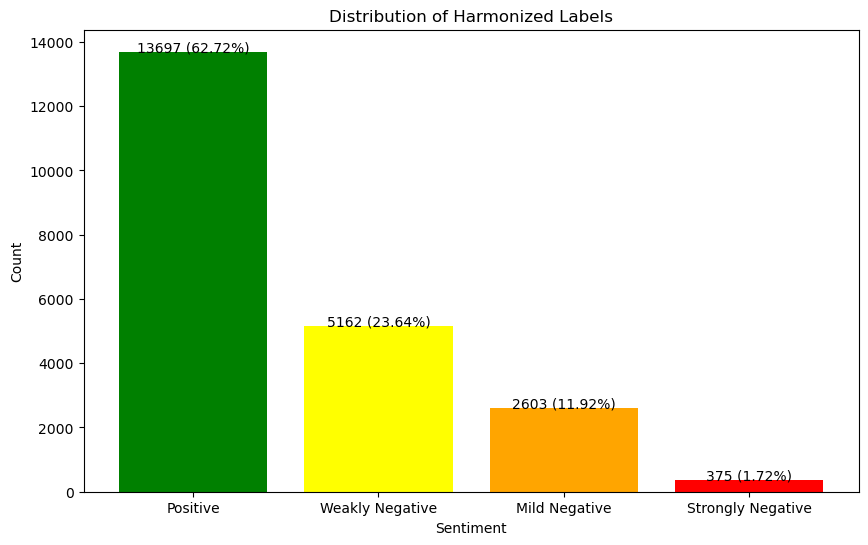

In [12]:
# Create a list of colors corresponding to each sentiment
colors = ['green', 'yellow', 'orange', 'red']

# Set the figure size
plt.figure(figsize=(10, 6))

# Plot the bar chart
plt.bar(sentiment_df['Sentiment'], sentiment_df['Count'], color=colors)

# Add labels and title to the chart
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Distribution of Harmonized Labels')

# Display the count and percentage values on top of each bar
for i, count in enumerate(sentiment_df['Count']):
    plt.text(i, count, f"{count} ({sentiment_df['Percentage'][i]})", ha='center')

# Show the plot
plt.show()

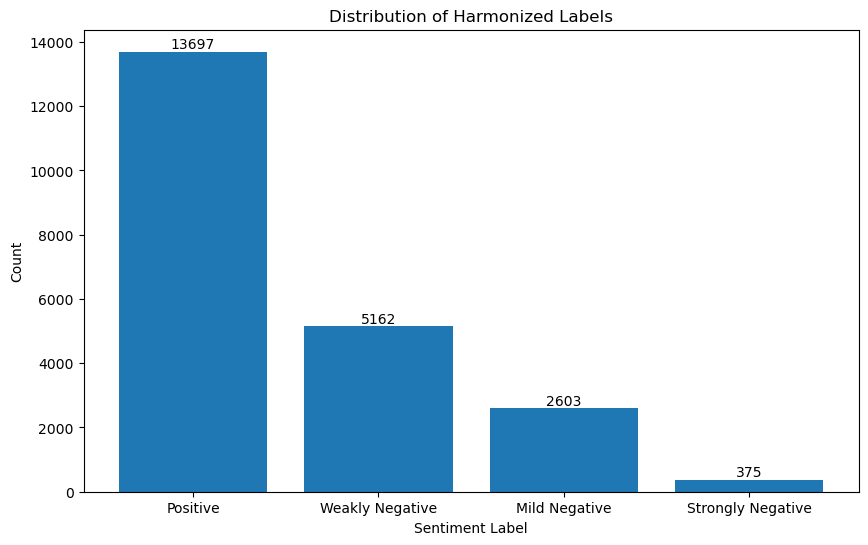

In [13]:
import matplotlib.pyplot as plt

# Calculate the count of each label
label_counts = results_df['Harmonized_Label'].value_counts()

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.bar(label_counts.index, label_counts.values)
plt.xlabel('Sentiment Label')
plt.ylabel('Count')
plt.title('Distribution of Harmonized Labels')

# Add subtitles for each label count
for i, v in enumerate(label_counts.values):
    plt.text(i, v, str(v), ha='center', va='bottom')

# Display the histogram
plt.show()

**Save harmonization results into CSV file**

In [ ]:
#Save the VADER sentiment dataset
results_df.to_csv('V3 Harmonized [VADER & TextBlob]_All Keywords (Whole Malaysia).csv', index=False)

<h2>Another alternative here!</h2>

Now, we want to calculate the total % of +ve & -ve tweets

In [ ]:
total_pos = len(tweets.loc[tweets['sentiment'] == "positive"])
total_neg = len(tweets.loc[tweets['sentiment'] == "negative"])
total_neu = len(tweets.loc[tweets['sentiment'] == "neutral"])
total_tweets = len(tweets)
print("Total Positive Tweets % : {:.2f}"
      .format((total_pos/total_tweets)*100))
print("Total Negative Tweets % : {:.2f}"
      .format((total_neg/total_tweets)*100))
print("Total Neutral Tweets % : {:.2f}"
      .format((total_neu/total_tweets)*100))

In [ ]:
#display the total +ve & -ve tweets in a PIE CHART
import matplotlib.pyplot as plt

mylabels = ["Positive", "Negative", "Neutral"]
mycolors = ["Green", "Red", "Blue"]
 
plt.figure(figsize=(8, 5),
           dpi=600)  # Push new figure on stack
myexplode = [0, 0.2, 0]
plt.pie([total_pos, total_neg, total_neu], colors=mycolors,
        labels=mylabels, explode=myexplode)
plt.show()